In [1]:
import pandas as pd
import seaborn as sb
import numpy as np

import itertools

from pandas import Series, DataFrame
from pandas import set_option

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict

from sklearn import metrics 
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.datasets import load_iris


# Importe as bibliotecas de Pipelines e Pré-processadores
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

import pydotplus
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')
# !ls "/content/drive/My Drive/datasets"
# heart = pd.read_csv('/content/drive/My Drive/datasets/heart.csv',sep=',') # faz a leitura dos dados

pulsar = pd.read_csv("/Users/andrerodrigues/Google Drive/FIAP-MBA 8IA/009 - Deep Learning & Reinforcement Learning/Fontes/pulsar_stars.csv", sep=",")
pulsar

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0
...,...,...,...,...,...,...,...,...,...
17893,136.429688,59.847421,-0.187846,-0.738123,1.296823,12.166062,15.450260,285.931022,0
17894,122.554688,49.485605,0.127978,0.323061,16.409699,44.626893,2.945244,8.297092,0
17895,119.335938,59.935939,0.159363,-0.743025,21.430602,58.872000,2.499517,4.595173,0
17896,114.507812,53.902400,0.201161,-0.024789,1.946488,13.381731,10.007967,134.238910,0


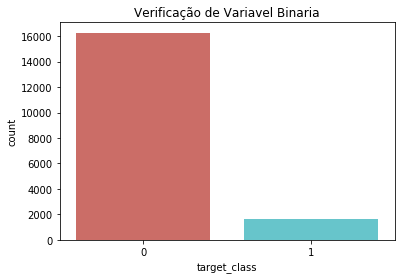

In [3]:
# Como estamos construindo um modelo para prever se uma estrela é de neutron ou não , 
# nosso alvo será a variável "target_class" do dataframe pulsar.

# Para ter certeza de que é uma variável binária, vamos usar a função countplot () do Seaborn.
plot = sb.countplot(x='target_class',data=pulsar, palette='hls')
plt.title("Verificação de Variavel Binaria")
plt.show(plot)

In [4]:
# # Checking for missing values
# É fácil checar missing values usando método isnull() com o método sum(), o número retornado condiz com a quantidade True 
# para o teste, ou seja, quantidade de valores nulos nas variaveis

pulsar.isnull().sum()

 Mean of the integrated profile                  0
 Standard deviation of the integrated profile    0
 Excess kurtosis of the integrated profile       0
 Skewness of the integrated profile              0
 Mean of the DM-SNR curve                        0
 Standard deviation of the DM-SNR curve          0
 Excess kurtosis of the DM-SNR curve             0
 Skewness of the DM-SNR curve                    0
target_class                                     0
dtype: int64

In [5]:
pulsar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
 Mean of the integrated profile                  17898 non-null float64
 Standard deviation of the integrated profile    17898 non-null float64
 Excess kurtosis of the integrated profile       17898 non-null float64
 Skewness of the integrated profile              17898 non-null float64
 Mean of the DM-SNR curve                        17898 non-null float64
 Standard deviation of the DM-SNR curve          17898 non-null float64
 Excess kurtosis of the DM-SNR curve             17898 non-null float64
 Skewness of the DM-SNR curve                    17898 non-null float64
target_class                                     17898 non-null int64
dtypes: float64(8), int64(1)
memory usage: 1.2 MB


In [6]:
pulsar.columns

Index([' Mean of the integrated profile',
       ' Standard deviation of the integrated profile',
       ' Excess kurtosis of the integrated profile',
       ' Skewness of the integrated profile', ' Mean of the DM-SNR curve',
       ' Standard deviation of the DM-SNR curve',
       ' Excess kurtosis of the DM-SNR curve', ' Skewness of the DM-SNR curve',
       'target_class'],
      dtype='object')

In [7]:
pulsar = pulsar.sample(frac=1).reset_index(drop=True)
pulsar

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,156.156250,54.765899,-0.517581,0.010932,6.780100,32.201175,5.454893,30.337572,0
1,122.710938,50.142944,0.128431,-0.083521,3.972408,24.707251,6.635008,45.240228,0
2,110.335938,51.561898,0.255199,-0.009807,2.153846,18.666894,9.750984,101.455256,0
3,147.742188,39.862507,-0.269904,1.342024,3.673077,24.172616,8.034488,67.732231,0
4,103.593750,48.088044,0.350781,0.197296,2.453177,15.246042,10.675217,146.067167,0
...,...,...,...,...,...,...,...,...,...
17893,150.617188,47.120544,-0.045707,0.031660,162.030100,85.231688,-1.115393,-0.384172,0
17894,117.351562,47.600812,0.163798,-0.173309,3.364548,17.781399,6.934597,59.906773,1
17895,105.484375,42.219661,0.309383,0.682723,2.162207,13.776845,10.745293,153.053945,0
17896,136.062500,53.751126,-0.082491,-0.351883,3.323579,21.325628,7.957967,69.446130,0


                                                Mean of the integrated profile  \
 Mean of the integrated profile                                           1.00   
 Standard deviation of the integrated profile                             0.55   
 Excess kurtosis of the integrated profile                               -0.87   
 Skewness of the integrated profile                                      -0.74   
 Mean of the DM-SNR curve                                                -0.30   
 Standard deviation of the DM-SNR curve                                  -0.31   
 Excess kurtosis of the DM-SNR curve                                      0.23   
 Skewness of the DM-SNR curve                                             0.14   
target_class                                                             -0.67   

                                                Standard deviation of the integrated profile  \
 Mean of the integrated profile                                                    

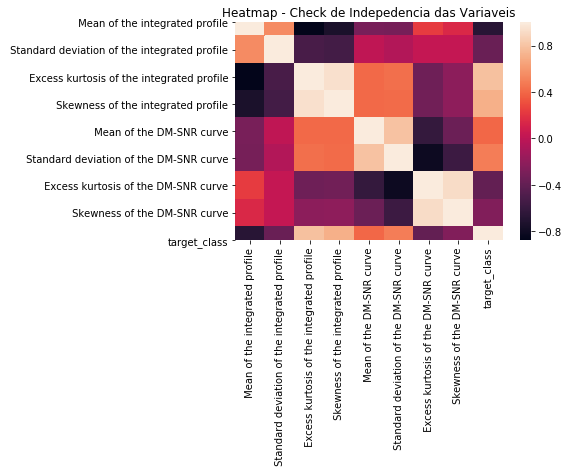

In [8]:
# Agora temos um conjunto de dados com todas as variáveis no formato correto!
# # Validando independencia entre as variáveis
set_option('precision', 2)
correla = pulsar.corr(method='pearson')
print(correla)
plot1 = sb.heatmap(pulsar.corr()) 
print('\n')
plt.title("Heatmap - Check de Indepedencia das Variaveis")
plt.show(plot1)

In [9]:
to_del = correla[abs(correla) > 0.9].fillna(0)
to_del

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
Mean of the integrated profile,1.0,0.0,0.00,0.00,0.0,0.0,0.00,0.00,0.0
Standard deviation of the integrated profile,0.0,1.0,0.00,0.00,0.0,0.0,0.00,0.00,0.0
Excess kurtosis of the integrated profile,0.0,0.0,1.00,0.95,0.0,0.0,0.00,0.00,0.0
Skewness of the integrated profile,0.0,0.0,0.95,1.00,0.0,0.0,0.00,0.00,0.0
Mean of the DM-SNR curve,0.0,0.0,0.00,0.00,1.0,0.0,0.00,0.00,0.0
Standard deviation of the DM-SNR curve,0.0,0.0,0.00,0.00,0.0,1.0,0.00,0.00,0.0
Excess kurtosis of the DM-SNR curve,0.0,0.0,0.00,0.00,0.0,0.0,1.00,0.92,0.0
Skewness of the DM-SNR curve,0.0,0.0,0.00,0.00,0.0,0.0,0.92,1.00,0.0
target_class,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.00,1.0


In [10]:
# pulsar.drop(columns=' Skewness of the integrated profile', axis=1,inplace=True)
# pulsar

In [11]:
X = pulsar.iloc[:,:-1].values
y = pulsar.iloc[:,-1].values

In [12]:
n = X.shape[1]
n

8

In [13]:
X = StandardScaler().fit_transform(X)

## GridSearch

In [25]:
from sklearn.model_selection import GridSearchCV

parameters = {
    'hidden_layer_sizes': [(255,),(8,31),(31,8),(128,127),(127,128)] # Aplicando o metodo de Hunter Nh = N^n - 1
    ,'activation': ['identity', 'logistic', 'tanh', 'relu']
    ,'solver': ['lbfgs', 'sgd', 'adam']
    ,'alpha': 10.0 ** -np.arange(1, 10)
    ,'learning_rate': ['constant', 'invscaling', 'adaptive']
    ,'early_stopping': [True]
    ,'random_state':[25]
}

# parameters={
# 'learning_rate': ["constant", "invscaling", "adaptive"],
# 'hidden_layer_sizes': [(100,1), (100,2), (100,3)],
# 'alpha': [10.0 ** -np.arange(1, 7)],
# 'activation': ["logistic", "relu", "Tanh"]
# }

# clf= gridSearchCV(estimator=MLPClassifier,param_grid=parameters,n_jobs=-1,verbose=2,cv=10)

#### Faz o tuning dos parametros testando cada combinação utilziando CrossValidation com 10 folds e analisando a acurácia

In [26]:
grid = GridSearchCV(
    MLPClassifier()
    ,param_grid=parameters
    ,n_jobs=-1
    ,cv=10
    ,scoring='accuracy'
    ,verbose=2
)

In [27]:
grid.fit(X,y)

Fitting 10 folds for each of 1620 candidates, totalling 16200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    8.6s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   41.2s
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 989 tasks      | elapsed:  7.1min
[Parallel(n_jobs=-1)]: Done 1434 tasks      | elapsed: 10.3min
[Parallel(n_jobs=-1)]: Done 1961 tasks      | elapsed: 13.7min
[Parallel(n_jobs=-1)]: Done 2568 tasks      | elapsed: 17.6min
[Parallel(n_jobs=-1)]: Done 3257 tasks      | elapsed: 23.2min
[Parallel(n_jobs=-1)]: Done 4026 tasks      | elapsed: 28.6min
[Parallel(n_jobs=-1)]: Done 4877 tasks      | elapsed: 52.5min
[Parallel(n_jobs=-1)]: Done 5808 tasks      | elapsed: 81.4min
[Parallel(n_jobs=-1)]: Done 6821 tasks      | elapsed: 115.0min
[Parallel(n_jobs=-1)]: Done 7914 tasks      | elapsed: 144.2min
[Parallel(n_jobs=-1)]: Done 9089 tasks      

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_iter=200,
                                     momentum=0.9, n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_st...
                         'alpha': array([1.e-01, 1.e-02, 1.e-03, 1.e-04, 1.e-05, 1.e-06, 1.e-07, 1.e-08,
       1.e-09]),
                         'early_stopping': [True],
                         'hidden_layer_sizes': [(255,), (8, 31), (31, 8),
                                                (128, 127), (127, 128)],


In [28]:
# grid.cv_results_

In [29]:
grid.best_params_

{'activation': 'tanh',
 'alpha': 0.001,
 'early_stopping': True,
 'hidden_layer_sizes': (127, 128),
 'learning_rate': 'constant',
 'random_state': 25,
 'solver': 'adam'}

In [30]:
grid.best_score_

0.980388870264834

#### Métricas de Avaliação de Modelos

In [31]:
pip_1 = Pipeline([
#     ('scaler',StandardScaler()),
    ('clf', MLPClassifier
     (  activation='tanh'
        ,alpha= 0.001
        ,early_stopping = True
        ,hidden_layer_sizes= (127, 128)
        ,learning_rate= 'constant'
        ,random_state= 25
        ,solver= 'adam'
     )
    )
])

In [32]:
resultados = cross_val_predict(pip_1, X, y, cv=10)

In [33]:
print (metrics.classification_report(y,resultados,target_names=['0','1']))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     16259
           1       0.93      0.85      0.89      1639

    accuracy                           0.98     17898
   macro avg       0.96      0.92      0.94     17898
weighted avg       0.98      0.98      0.98     17898

